# Desicion tree and Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors)

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Getting data

In [2]:
loans_df = pd.read_csv('loan_data.csv')

In [3]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [57]:
loans_df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Looks like an unbalanced dataset, as not paid loans are ~18% of whole set

In [4]:
loans_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans_df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Exploratory data analysis

Dist plot for fico score distribution according to credit policy value

Text(0.5, 0, 'FICO')

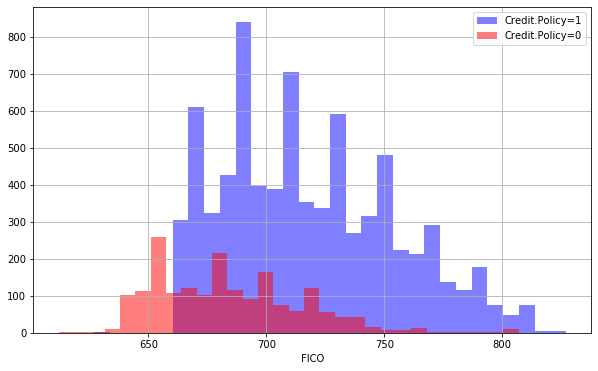

In [17]:
plt.figure(figsize=(10,6))
loans_df[loans_df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
loans_df[loans_df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Right now it's distplot of same (fico) values according to not fully paid column values

Text(0.5, 0, 'FICO')

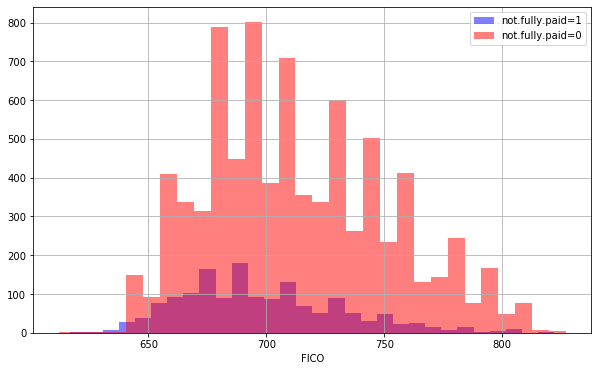

In [19]:
plt.figure(figsize=(10,6))
loans_df[loans_df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
loans_df[loans_df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

#### Countplot of loans by purpose, with the color hue defined by not.fully.paid column values

Text(0.5, 0, 'purpose')

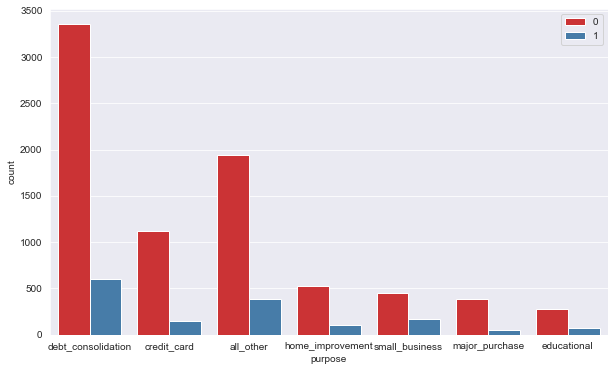

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans_df, palette='Set1')
plt.legend()
plt.xlabel('purpose')

#### Jointplot between FICO score and interest rate to see trend between those parameters

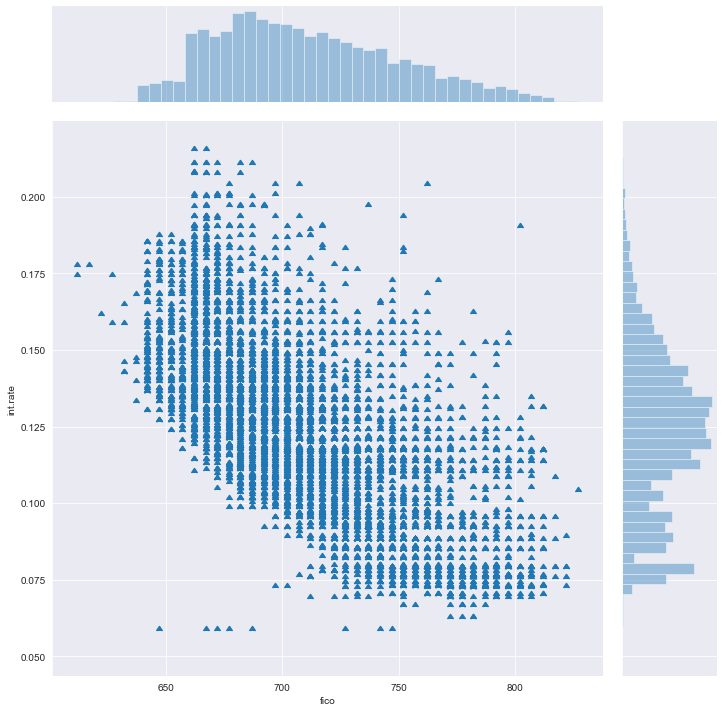

In [30]:
sns.jointplot(x='fico', y='int.rate', data=loans_df, marker=6, height=10)

#### lmplots to see if the trend differed between not.fully.paid and credit.policy

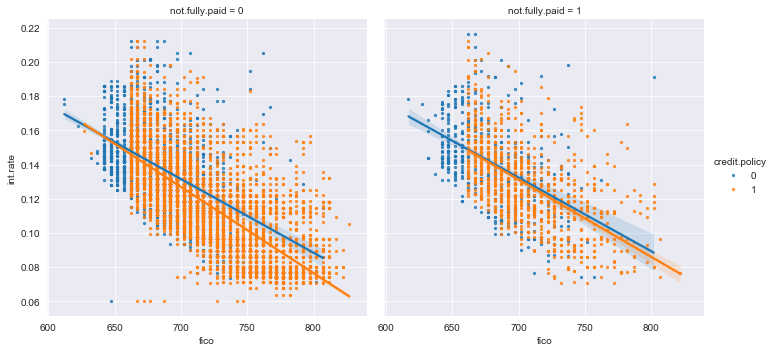

In [33]:
sns.lmplot(x='fico', y='int.rate', data=loans_df, hue='credit.policy', col='not.fully.paid', scatter_kws={"s": 5})

Looks like when customer meets criteria (credit.policy == 1), fico scores are usually higher as well as interest rates then is lower. Regression lines suggest that when loans are paid and credit policy is met, regression line is steeper. 

### Setting up data for classification using desicion tree and random forest

## Categorical Features

Notice that the **purpose** column as categorical


**Creating dummy variables for categorical column using pd.get_dummies()**

In [34]:
full_df = pd.get_dummies(loans_df, columns=['purpose'], drop_first=True)

In [35]:
full_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

** Splitting data into a training set and a testing sets**

In [45]:
from sklearn.model_selection import train_test_split

y = full_df['not.fully.paid']
X = full_df.drop(['not.fully.paid'], axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training a Decision Tree Model

In [40]:
from sklearn.tree import DecisionTreeClassifier

**Creating an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [41]:
dtree = DecisionTreeClassifier()

In [47]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [48]:
dtree_pred = dtree.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2408
           1       0.21      0.23      0.22       466

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.74      2874



In [51]:
print(confusion_matrix(y_test,dtree_pred))

[[2021  387]
 [ 361  105]]


## Training the Random Forest model

**Creating an instance of the RandomForestClassifier class and fitting it**

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

## Predictions and Evaluation

** Predicting the class of not.fully.paid for the X_test data.**

In [54]:
rfc_pred = rfc.predict(X_test)

**Classification report from the results.**

In [55]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.35      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.59      0.50      0.47      2874
weighted avg       0.76      0.84      0.77      2874



**Confusion Matrix for the predictions.**

In [56]:
print(confusion_matrix(y_test,rfc_pred))

[[2395   13]
 [ 459    7]]


**Overall better performance (according to f1 score) showed random forest, but recall score regarding loan being not fully paid is concerning.**
**Resampling (oversample/undersample) should be considered**